In [1]:
"""
환승연애2 - 3개 케이스 비교 분석 코드
===========================================
케이스 1: 나연-희두 (X 재결합 성공)
케이스 2: 해은-현규 (환승 성공)
케이스 3: 정규민 (실패)

분석 목표: 각 케이스의 차이점을 정량적으로 규명
"""

'\n환승연애2 - 3개 케이스 비교 분석 코드\n===========================================\n케이스 1: 나연-희두 (X 재결합 성공)\n케이스 2: 해은-현규 (환승 성공)\n케이스 3: 정규민 (실패)\n\n분석 목표: 각 케이스의 차이점을 정량적으로 규명\n'

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager as fm
import os

# =============================================================================
# 1단계: matplotlib 캐시 삭제 (가장 중요!)
# =============================================================================
import shutil
cache_dir = mpl.get_cachedir()
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)
    print(f"✓ matplotlib 캐시 삭제: {cache_dir}")

# =============================================================================
# 2단계: 폰트 매니저 재빌드
# =============================================================================
fm._load_fontmanager(try_read_cache=False)
print("✓ 폰트 매니저 재빌드 완료")

# =============================================================================
# 3단계: 시스템에서 한글 지원 폰트 찾기
# =============================================================================
font_list = [f.name for f in fm.fontManager.ttflist]

# 한글 지원 가능한 폰트 우선순위
candidates = [
    'NanumGothic',
    'NanumBarunGothic',
    'Malgun Gothic',
    'AppleGothic', 
    'UnDotum',
    'IPAGothic',  # 일본어 폰트지만 한글도 지원
    'IPAPGothic',
    'DejaVu Sans'
]

selected_font = None
for font in candidates:
    if font in font_list:
        selected_font = font
        print(f"✓ 선택된 폰트: {selected_font}")
        break

if not selected_font:
    selected_font = 'DejaVu Sans'
    print(f"⚠ 한글 폰트 없음. 기본 폰트 사용: {selected_font}")

Could not save font_manager cache [Errno 2] No such file or directory: 'C:\\Users\\Comet\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


✓ 폰트 매니저 재빌드 완료
✓ 선택된 폰트: NanumGothic


In [25]:
# =============================================================================
# STEP 1: 데이터 로드
# =============================================================================

print("="*70)
print("STEP 1: 데이터 로드")
print("="*70)

# 기본 데이터 로드
char_profile = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\character_profile.csv', encoding='utf-8-sig')
message_log = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\message_log.csv', encoding='utf-8-sig')
episode_log = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\episode_event_log.csv', encoding='utf-8-sig')
haeeun_kyumin = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\result\환연2_해은규민_pair_ai.csv', encoding='utf-8-sig')
nayeon_heedu = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\result\환연2_희두나연_pair_ai.csv', encoding='utf-8-sig')

# 주요 인물 정보 확인
print("\n주요 인물 프로필:")
target_people = char_profile[char_profile['name'].isin(['성해은', '정규민', '정현규', '이나연', '남희두'])]
display(target_people[['name', 'mbti', 'relationship_months', 'breakup_months', 'entry_episode']])

print("\n✓ 데이터 로드 완료")

STEP 1: 데이터 로드

주요 인물 프로필:


,name,mbti,relationship_months,breakup_months,entry_episode
0,성해은,INFP,76,15,5
1,정규민,ENTJ,76,15,1
2,이나연,ESFP,31,5,1
3,남희두,INTP,31,5,6
9,정현규,ESTJ,14,30,15



✓ 데이터 로드 완료


In [27]:
# =============================================================================
# STEP 2: 3개 케이스 정의 및 결과 변수 설정
# =============================================================================

print("\n" + "="*70)
print("STEP 2: 3개 케이스 정의")
print("="*70)

# 케이스 정의
cases = {
    'Case1_Reunion': {
        'name': '나연-희두 (X 재결합)',
        'people': ['이나연', '남희두'],
        'result': 'X_REUNION',
        'description': 'X 파트너끼리 다시 만남',
        'color': '#2ecc71'  # 녹색
    },
    'Case2_Transfer': {
        'name': '해은-현규 (환승 성공)',
        'people': ['성해은', '정현규'],
        'result': 'NEW_RELATIONSHIP',
        'description': '새로운 사람과 관계 시작',
        'color': '#3498db'  # 파란색
    },
    'Case3_Failed': {
        'name': '정규민 (실패)',
        'people': ['정규민'],
        'result': 'ALONE',
        'description': '아무도 선택 못함',
        'color': '#e74c3c'  # 빨간색
    }
}

for case_id, case_info in cases.items():
    print(f"\n[{case_id}] {case_info['name']}")
    print(f"  인물: {', '.join(case_info['people'])}")
    print(f"  결과: {case_info['result']}")
    print(f"  설명: {case_info['description']}")

print("\n✓ 케이스 정의 완료")


STEP 2: 3개 케이스 정의

[Case1_Reunion] 나연-희두 (X 재결합)
  인물: 이나연, 남희두
  결과: X_REUNION
  설명: X 파트너끼리 다시 만남

[Case2_Transfer] 해은-현규 (환승 성공)
  인물: 성해은, 정현규
  결과: NEW_RELATIONSHIP
  설명: 새로운 사람과 관계 시작

[Case3_Failed] 정규민 (실패)
  인물: 정규민
  결과: ALONE
  설명: 아무도 선택 못함

✓ 케이스 정의 완료


In [28]:
# =============================================================================
# STEP 3: 분석 지표 설계 (주인님이 직접 수정 가능)
# =============================================================================

print("\n" + "="*70)
print("STEP 3: 분석 지표 설계")
print("="*70)

# 분석할 지표 리스트 (주인님이 추가/삭제 가능)
metrics = {
    '1_문자_발송_패턴': {
        'description': '속마음 문자를 누구에게 얼마나 보냈는가',
        'method': 'message_log 분석'
    },
    '2_미련도_점수': {
        'description': '미련 관련 키워드 빈도',
        'method': 'text mining (보고싶, 그리워, 후회 등)'
    },
    '3_감정_변화': {
        'description': '긍정/부정 감정 비율 및 변화',
        'method': 'sentiment 분석'
    },
    '4_관심_집중도': {
        'description': 'attention 카테고리 발화 빈도',
        'method': 'category 분석'
    },
    '5_MBTI_조합': {
        'description': 'MBTI 유형 및 J-P 조합',
        'method': '프로필 데이터 매칭'
    },
    '6_투입_타이밍': {
        'description': '메기 투입 시점 및 영향도',
        'method': 'entry_episode 분석'
    }
}

for metric_id, metric_info in metrics.items():
    print(f"\n[{metric_id}]")
    print(f"  지표: {metric_info['description']}")
    print(f"  방법: {metric_info['method']}")

print("\n✓ 지표 설계 완료")


STEP 3: 분석 지표 설계

[1_문자_발송_패턴]
  지표: 속마음 문자를 누구에게 얼마나 보냈는가
  방법: message_log 분석

[2_미련도_점수]
  지표: 미련 관련 키워드 빈도
  방법: text mining (보고싶, 그리워, 후회 등)

[3_감정_변화]
  지표: 긍정/부정 감정 비율 및 변화
  방법: sentiment 분석

[4_관심_집중도]
  지표: attention 카테고리 발화 빈도
  방법: category 분석

[5_MBTI_조합]
  지표: MBTI 유형 및 J-P 조합
  방법: 프로필 데이터 매칭

[6_투입_타이밍]
  지표: 메기 투입 시점 및 영향도
  방법: entry_episode 분석

✓ 지표 설계 완료


In [39]:
# =============================================================================
# STEP 4: 지표별 분석 함수 (주인님이 직접 실행)
# =============================================================================
print("\n" + "="*70)
print("STEP 4: 분석 함수 정의")
print("="*70)

# ---------------------------------------------------------------------------
# 함수 1: 속마음 문자 패턴 분석
# ---------------------------------------------------------------------------

def analyze_message_pattern(person_name, message_df):
    """
    특정 인물의 속마음 문자 발송 패턴 분석
    
    Args:
        person_name: 분석 대상 이름 (예: '성해은')
        message_df: message_log 데이터프레임
    
    Returns:
        dict: 발송 통계
    """
    person_messages = message_df[
        (message_df['name'] == person_name) & 
        (message_df['message_txt'].notna())
    ]
    
    # 수신자별 분류
    recipients = person_messages['message'].value_counts().to_dict()
    
    result = {
        'total_sent': len(person_messages),
        'recipients': recipients,
        'unique_recipients': len(recipients)
    }
    
    return result

# 사용 예시
print("\n[함수 1: 속마음 문자 패턴 분석]\n")

print("\n[성해은: 속마음 문자 패턴]")
haeeun_msg = analyze_message_pattern('성해은', message_log)
print(f"성해은 문자 발송: {haeeun_msg['total_sent']}회")
print(f"수신자: {haeeun_msg['recipients']}")


print("\n[정규민: 속마음 문자 패턴]")
kyumin_msg = analyze_message_pattern('정규민', message_log)
print(f"정규민 문자 발송: {kyumin_msg['total_sent']}회")
print(f"수신자: {kyumin_msg['recipients']}")

print("\n[이나연: 속마음 문자 패턴]")
nayeon_msg = analyze_message_pattern('이나연', message_log)
print(f"이나연 문자 발송: {nayeon_msg['total_sent']}회")
print(f"수신자: {nayeon_msg['recipients']}")

print("\n[남희두: 속마음 문자 패턴]")
heedu_msg = analyze_message_pattern('남희두', message_log)
print(f"남희두 문자 발송: {heedu_msg['total_sent']}회")
print(f"수신자: {heedu_msg['recipients']}")


STEP 4: 분석 함수 정의

[함수 1: 속마음 문자 패턴 분석]


[성해은: 속마음 문자 패턴]
성해은 문자 발송: 15회
수신자: {'정규민': 10, '정현규': 4, '박원빈': 1}

[정규민: 속마음 문자 패턴]
정규민 문자 발송: 17회
수신자: {'이나연': 9, '김지수': 5, '박나언': 2, '이지연': 1}

[이나연: 속마음 문자 패턴]
이나연 문자 발송: 16회
수신자: {'정규민': 7, '남희두': 6, '김태이': 2, '박원빈': 1}

[남희두: 속마음 문자 패턴]
남희두 문자 발송: 14회
수신자: {'이나연': 7, '이지연': 5, '성해은': 1, '김지수': 1}


In [37]:

# ---------------------------------------------------------------------------
# 함수 2: 미련도 점수 계산
# ---------------------------------------------------------------------------

def calculate_regret_score(person_name, conversation_df):
    """
    미련도 점수 계산 (0-100점)
    
    Args:
        person_name: 분석 대상 이름
        conversation_df: 대화 데이터프레임 (환연2_xxx_pair_ai.csv)
    
    Returns:
        dict: 미련도 점수 및 세부 내용
    """
    # 미련 키워드 정의 (주인님이 추가 가능)
    regret_keywords = ['보고 싶', '그리', '못 잊', '후회', '미련', '아쉬', '돌아', '다시']
    
    # 해당 인물의 발화만 필터링
    person_text = conversation_df[conversation_df['speaker'] == person_name]['text'].fillna('').str.lower()
    
    # 키워드별 빈도 계산
    keyword_counts = {}
    total_count = 0
    
    for keyword in regret_keywords:
        count = person_text.str.contains(keyword, na=False).sum()
        if count > 0:
            keyword_counts[keyword] = count
            total_count += count
    
    # 미련도 점수 = (키워드 총 빈도 / 총 발화 수) * 100
    total_utterances = len(person_text)
    regret_score = (total_count / total_utterances * 100) if total_utterances > 0 else 0
    
    result = {
        'score': round(regret_score, 2),
        'total_keywords': total_count,
        'keyword_detail': keyword_counts,
        'total_utterances': total_utterances
    }
    
    return result

# 사용 예시
print("\n[함수 2: 미련도 점수]\n")
haeeun_regret = calculate_regret_score('성해은', haeeun_kyumin)
print(f"성해은 미련도: {haeeun_regret['score']}점")
print(f"키워드 상세: {haeeun_regret['keyword_detail']}\n")

kyumin_regret = calculate_regret_score('정규민', haeeun_kyumin)
print(f"정규민 미련도: {kyumin_regret['score']}점")
print(f"키워드 상세: {kyumin_regret['keyword_detail']}\n")

nayeon_regret = calculate_regret_score('이나연', nayeon_heedu)
print(f"이나연 미련도: {nayeon_regret['score']}점")
print(f"키워드 상세: {nayeon_regret['keyword_detail']}\n")

heedu_regret = calculate_regret_score('남희두', nayeon_heedu)
print(f"남희두 미련도: {haeeun_regret['score']}점")
print(f"키워드 상세: {heedu_regret['keyword_detail']}")



[함수 2: 미련도 점수]

성해은 미련도: 11.64점
키워드 상세: {'보고 싶': np.int64(2), '그리': np.int64(7), '후회': np.int64(2), '미련': np.int64(2), '아쉬': np.int64(6), '다시': np.int64(3)}

정규민 미련도: 5.29점
키워드 상세: {'보고 싶': np.int64(4), '후회': np.int64(1), '미련': np.int64(1), '다시': np.int64(3)}

이나연 미련도: 6.64점
키워드 상세: {'보고 싶': np.int64(4), '그리': np.int64(6), '미련': np.int64(2), '돌아': np.int64(1), '다시': np.int64(3)}

남희두 미련도: 11.64점
키워드 상세: {'보고 싶': np.int64(3), '그리': np.int64(1), '미련': np.int64(1), '다시': np.int64(3)}


In [48]:
# ---------------------------------------------------------------------------
# 함수 3: 감정 분포 분석
# ---------------------------------------------------------------------------

def analyze_sentiment_distribution(person_name, conversation_df):
    """
    감정 분포 분석 (positive/negative/neutral 비율)
    
    Args:
        person_name: 분석 대상 이름
        conversation_df: 대화 데이터프레임
    
    Returns:
        dict: 감정 분포 통계
    """
    person_sentiment = conversation_df[conversation_df['speaker'] == person_name]['sentiment']
    
    # 감정 카테고리 통합
    sentiment_map = {
        '중립': 'neutral',
        '복합적': 'mixed',
        '궁금': 'neutral',
        '짜증': 'negative',
        '후회': 'negative'
    }
    person_sentiment = person_sentiment.replace(sentiment_map)
    
    # 비율 계산
    total = len(person_sentiment)
    distribution = person_sentiment.value_counts()
    
    result = {
        'positive_ratio': (distribution.get('positive', 0) / total * 100) if total > 0 else 0,
        'negative_ratio': (distribution.get('negative', 0) / total * 100) if total > 0 else 0,
        'neutral_ratio': (distribution.get('neutral', 0) / total * 100) if total > 0 else 0,
        'distribution': distribution.to_dict()
    }
    
    return result

In [50]:
# 사용 예시
print("\n[함수 3: 감정 분포]")

print("\n1.성해은 감정 분포\n")
haeeun_sentiment = analyze_sentiment_distribution('성해은', haeeun_kyumin)
print(f"성해은 감정 비율:")
print(f"  긍정: {haeeun_sentiment['positive_ratio']:.1f}%")
print(f"  부정: {haeeun_sentiment['negative_ratio']:.1f}%")
print(f"  중립: {haeeun_sentiment['neutral_ratio']:.1f}%")

print("\n2.정규민 감정 분포\n")
kyumin_sentiment = analyze_sentiment_distribution('정규민', haeeun_kyumin)
print(f"정규민 감정 비율:")
print(f"  긍정: {kyumin_sentiment['positive_ratio']:.1f}%")
print(f"  부정: {kyumin_sentiment['negative_ratio']:.1f}%")
print(f"  중립: {kyumin_sentiment['neutral_ratio']:.1f}%")

print("\n3.이나연 감정 분포\n")
nayeon_sentiment = analyze_sentiment_distribution('이나연', nayeon_heedu)
print(f"이나연 감정 비율:")
print(f"  긍정: {nayeon_sentiment['positive_ratio']:.1f}%")
print(f"  부정: {nayeon_sentiment['negative_ratio']:.1f}%")
print(f"  중립: {nayeon_sentiment['neutral_ratio']:.1f}%")

print("\n4.남희두 감정 분포\n")
heedu_sentiment = analyze_sentiment_distribution('남희두', nayeon_heedu)
print(f"남희두 감정 비율:")
print(f"  긍정: {heedu_sentiment['positive_ratio']:.1f}%")
print(f"  부정: {heedu_sentiment['negative_ratio']:.1f}%")
print(f"  중립: {heedu_sentiment['neutral_ratio']:.1f}%")


[함수 3: 감정 분포]

1.성해은 감정 분포

성해은 감정 비율:
  긍정: 20.1%
  부정: 40.2%
  중립: 38.6%

2.정규민 감정 분포

정규민 감정 비율:
  긍정: 15.9%
  부정: 29.4%
  중립: 54.7%

3.이나연 감정 분포

이나연 감정 비율:
  긍정: 24.9%
  부정: 38.2%
  중립: 33.2%

4.남희두 감정 분포

남희두 감정 비율:
  긍정: 15.9%
  부정: 33.8%
  중립: 49.3%


In [53]:
# ---------------------------------------------------------------------------
# 함수 4: Attention 집중도 분석
# ---------------------------------------------------------------------------

def analyze_attention_focus(person_name, conversation_df):
    """
    상대방에 대한 관심/집착 표현 빈도 분석
    
    Args:
        person_name: 분석 대상 이름
        conversation_df: 대화 데이터프레임
    
    Returns:
        dict: attention 통계
    """
    person_conv = conversation_df[conversation_df['speaker'] == person_name]
    attention_utterances = person_conv[person_conv['category'] == 'attention']
    
    total_utterances = len(person_conv)
    attention_count = len(attention_utterances)
    
    result = {
        'attention_count': attention_count,
        'total_utterances': total_utterances,
        'attention_ratio': (attention_count / total_utterances * 100) if total_utterances > 0 else 0
    }
    
    return result

# 사용 예시
print("\n[함수 4: Attention 집중도]")

print("\n1.성해은 Attention 집중도\n")
haeeun_attention = analyze_attention_focus('성해은', haeeun_kyumin)
print(f"성해은 attention: {haeeun_attention['attention_count']}회 ({haeeun_attention['attention_ratio']:.1f}%)")

print("\n2.정규민 Attention 집중도\n")
kyumin_attention = analyze_attention_focus('정규민', haeeun_kyumin)
print(f"정규민 attention: {kyumin_attention['attention_count']}회 ({kyumin_attention['attention_ratio']:.1f}%)")

print("\n3.이나연 Attention 집중도\n")
nayeon_attention = analyze_attention_focus('이나연', nayeon_heedu)
print(f"이나연 attention: {nayeon_attention['attention_count']}회 ({nayeon_attention['attention_ratio']:.1f}%)")

print("\n4.남희두 Attention 집중도\n")
heedu_attention = analyze_attention_focus('남희두', nayeon_heedu)
print(f"남희두 attention: {heedu_attention['attention_count']}회 ({heedu_attention['attention_ratio']:.1f}%)")



[함수 4: Attention 집중도]

1.성해은 Attention 집중도

성해은 attention: 76회 (40.2%)

2.정규민 Attention 집중도

정규민 attention: 35회 (20.6%)

3.이나연 Attention 집중도

이나연 attention: 85회 (35.3%)

4.남희두 Attention 집중도

남희두 attention: 46회 (22.2%)


In [55]:
# =============================================================================
# STEP 5: 3개 케이스 종합 비교 (주인님이 실행)
# =============================================================================

print("\n" + "="*70)
print("STEP 5: 3개 케이스 종합 비교 실행")
print("="*70)

# 결과 저장용 데이터프레임 초기화
comparison_data = []

# Case 1: 나연-희두 분석
print("\n[Case 1: 나연-희두 분석 중...]")
nayeon_data = {
    'case': 'X 재결합',
    'person': '이나연',
    'mbti': 'ESFP',
    'message_to_x': len(message_log[(message_log['name']=='이나연') & (message_log['message']=='남희두') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('이나연', nayeon_heedu)['score'],
    'negative_ratio': analyze_sentiment_distribution('이나연', nayeon_heedu)['negative_ratio'],
    'attention_ratio': analyze_attention_focus('이나연', nayeon_heedu)['attention_ratio'],
    'relationship_months': 31,
    'result_color': cases['Case1_Reunion']['color']
}
comparison_data.append(nayeon_data)

hidu_data = {
    'case': 'X 재결합',
    'person': '남희두',
    'mbti': 'INTP',
    'message_to_x': len(message_log[(message_log['name']=='남희두') & (message_log['message']=='이나연') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('남희두', nayeon_heedu)['score'],
    'negative_ratio': analyze_sentiment_distribution('남희두', nayeon_heedu)['negative_ratio'],
    'attention_ratio': analyze_attention_focus('남희두', nayeon_heedu)['attention_ratio'],
    'relationship_months': 31,
    'result_color': cases['Case1_Reunion']['color']
}
comparison_data.append(hidu_data)

# Case 2: 해은-현규 분석
print("[Case 2: 해은 분석 중...]")
# 주의: 현규 대화 데이터가 없으므로 해은 데이터만 분석
haeeun_data = {
    'case': '환승 성공',
    'person': '성해은',
    'mbti': 'INFP',
    'message_to_x': len(message_log[(message_log['name']=='성해은') & (message_log['message']=='정규민') & (message_log['message_txt'].notna())]),
    'message_to_new': len(message_log[(message_log['name']=='성해은') & (message_log['message']=='정현규') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('성해은', haeeun_kyumin)['score'],
    'negative_ratio': analyze_sentiment_distribution('성해은', haeeun_kyumin)['negative_ratio'],
    'attention_ratio': analyze_attention_focus('성해은', haeeun_kyumin)['attention_ratio'],
    'relationship_months': 76,
    'result_color': cases['Case2_Transfer']['color']
}
comparison_data.append(haeeun_data)

# Case 3: 정규민 분석
print("[Case 3: 정규민 분석 중...]")
gyumin_data = {
    'case': '실패',
    'person': '정규민',
    'mbti': 'ENTJ',
    'message_to_x': len(message_log[(message_log['name']=='정규민') & (message_log['message']=='성해은') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('정규민', haeeun_kyumin)['score'],
    'negative_ratio': analyze_sentiment_distribution('정규민', haeeun_kyumin)['negative_ratio'],
    'attention_ratio': analyze_attention_focus('정규민', haeeun_kyumin)['attention_ratio'],
    'relationship_months': 76,
    'result_color': cases['Case3_Failed']['color']
}
comparison_data.append(gyumin_data)

# 데이터프레임 생성
df_comparison = pd.DataFrame(comparison_data)

print("\n✓ 종합 비교 데이터 생성 완료")
print("\n비교 테이블:")
display(df_comparison[['case', 'person', 'mbti', 'message_to_x', 'regret_score', 'negative_ratio']])



STEP 5: 3개 케이스 종합 비교 실행

[Case 1: 나연-희두 분석 중...]
[Case 2: 해은 분석 중...]
[Case 3: 정규민 분석 중...]

✓ 종합 비교 데이터 생성 완료

비교 테이블:


,case,person,mbti,message_to_x,regret_score,negative_ratio
0,X 재결합,이나연,ESFP,6,6.64,38.174274
1,X 재결합,남희두,INTP,7,3.86,33.816425
2,환승 성공,성해은,INFP,10,11.64,40.211640
3,실패,정규민,ENTJ,0,5.29,29.411765


✓ matplotlib 설정 완료


주요 인물 프로필:
  name  mbti  relationship_months  breakup_months  entry_episode
0  성해은  INFP                   76              15              5
1  정규민  ENTJ                   76              15              1
2  이나연  ESFP                   31               5              1
3  남희두  INTP                   31               5              6
9  정현규  ESTJ                   14              30             15

✓ 데이터 로드 완료

✓ 데이터 수집 완료

시각화 생성 중...



C:\Users\Comet\AppData\Local\Temp\ipykernel_22492\2832351778.py:296: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) NanumGothic.
  plt.savefig(r'C:\Users\Comet\Documents\GitHub\project_team1\result\final_chart_korean.png', dpi=300, bbox_inches='tight')
C:\Users\Comet\AppData\Local\Temp\ipykernel_22492\2832351778.py:296: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) NanumGothic.
  plt.savefig(r'C:\Users\Comet\Documents\GitHub\project_team1\result\final_chart_korean.png', dpi=300, bbox_inches='tight')
C:\Users\Comet\AppData\Local\Temp\ipykernel_22492\2832351778.py:296: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) NanumGothic.
  plt.savefig(r'C:\Users\Comet\Documents\GitHub\project_team1\result\final_chart_korean.png', dpi=300, bbox_inches='tight')



✓ 저장 완료: final_chart_korean.png
✓ 한글 폰트 완벽 적용!


c:\Users\Comet\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Comet\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Comet\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


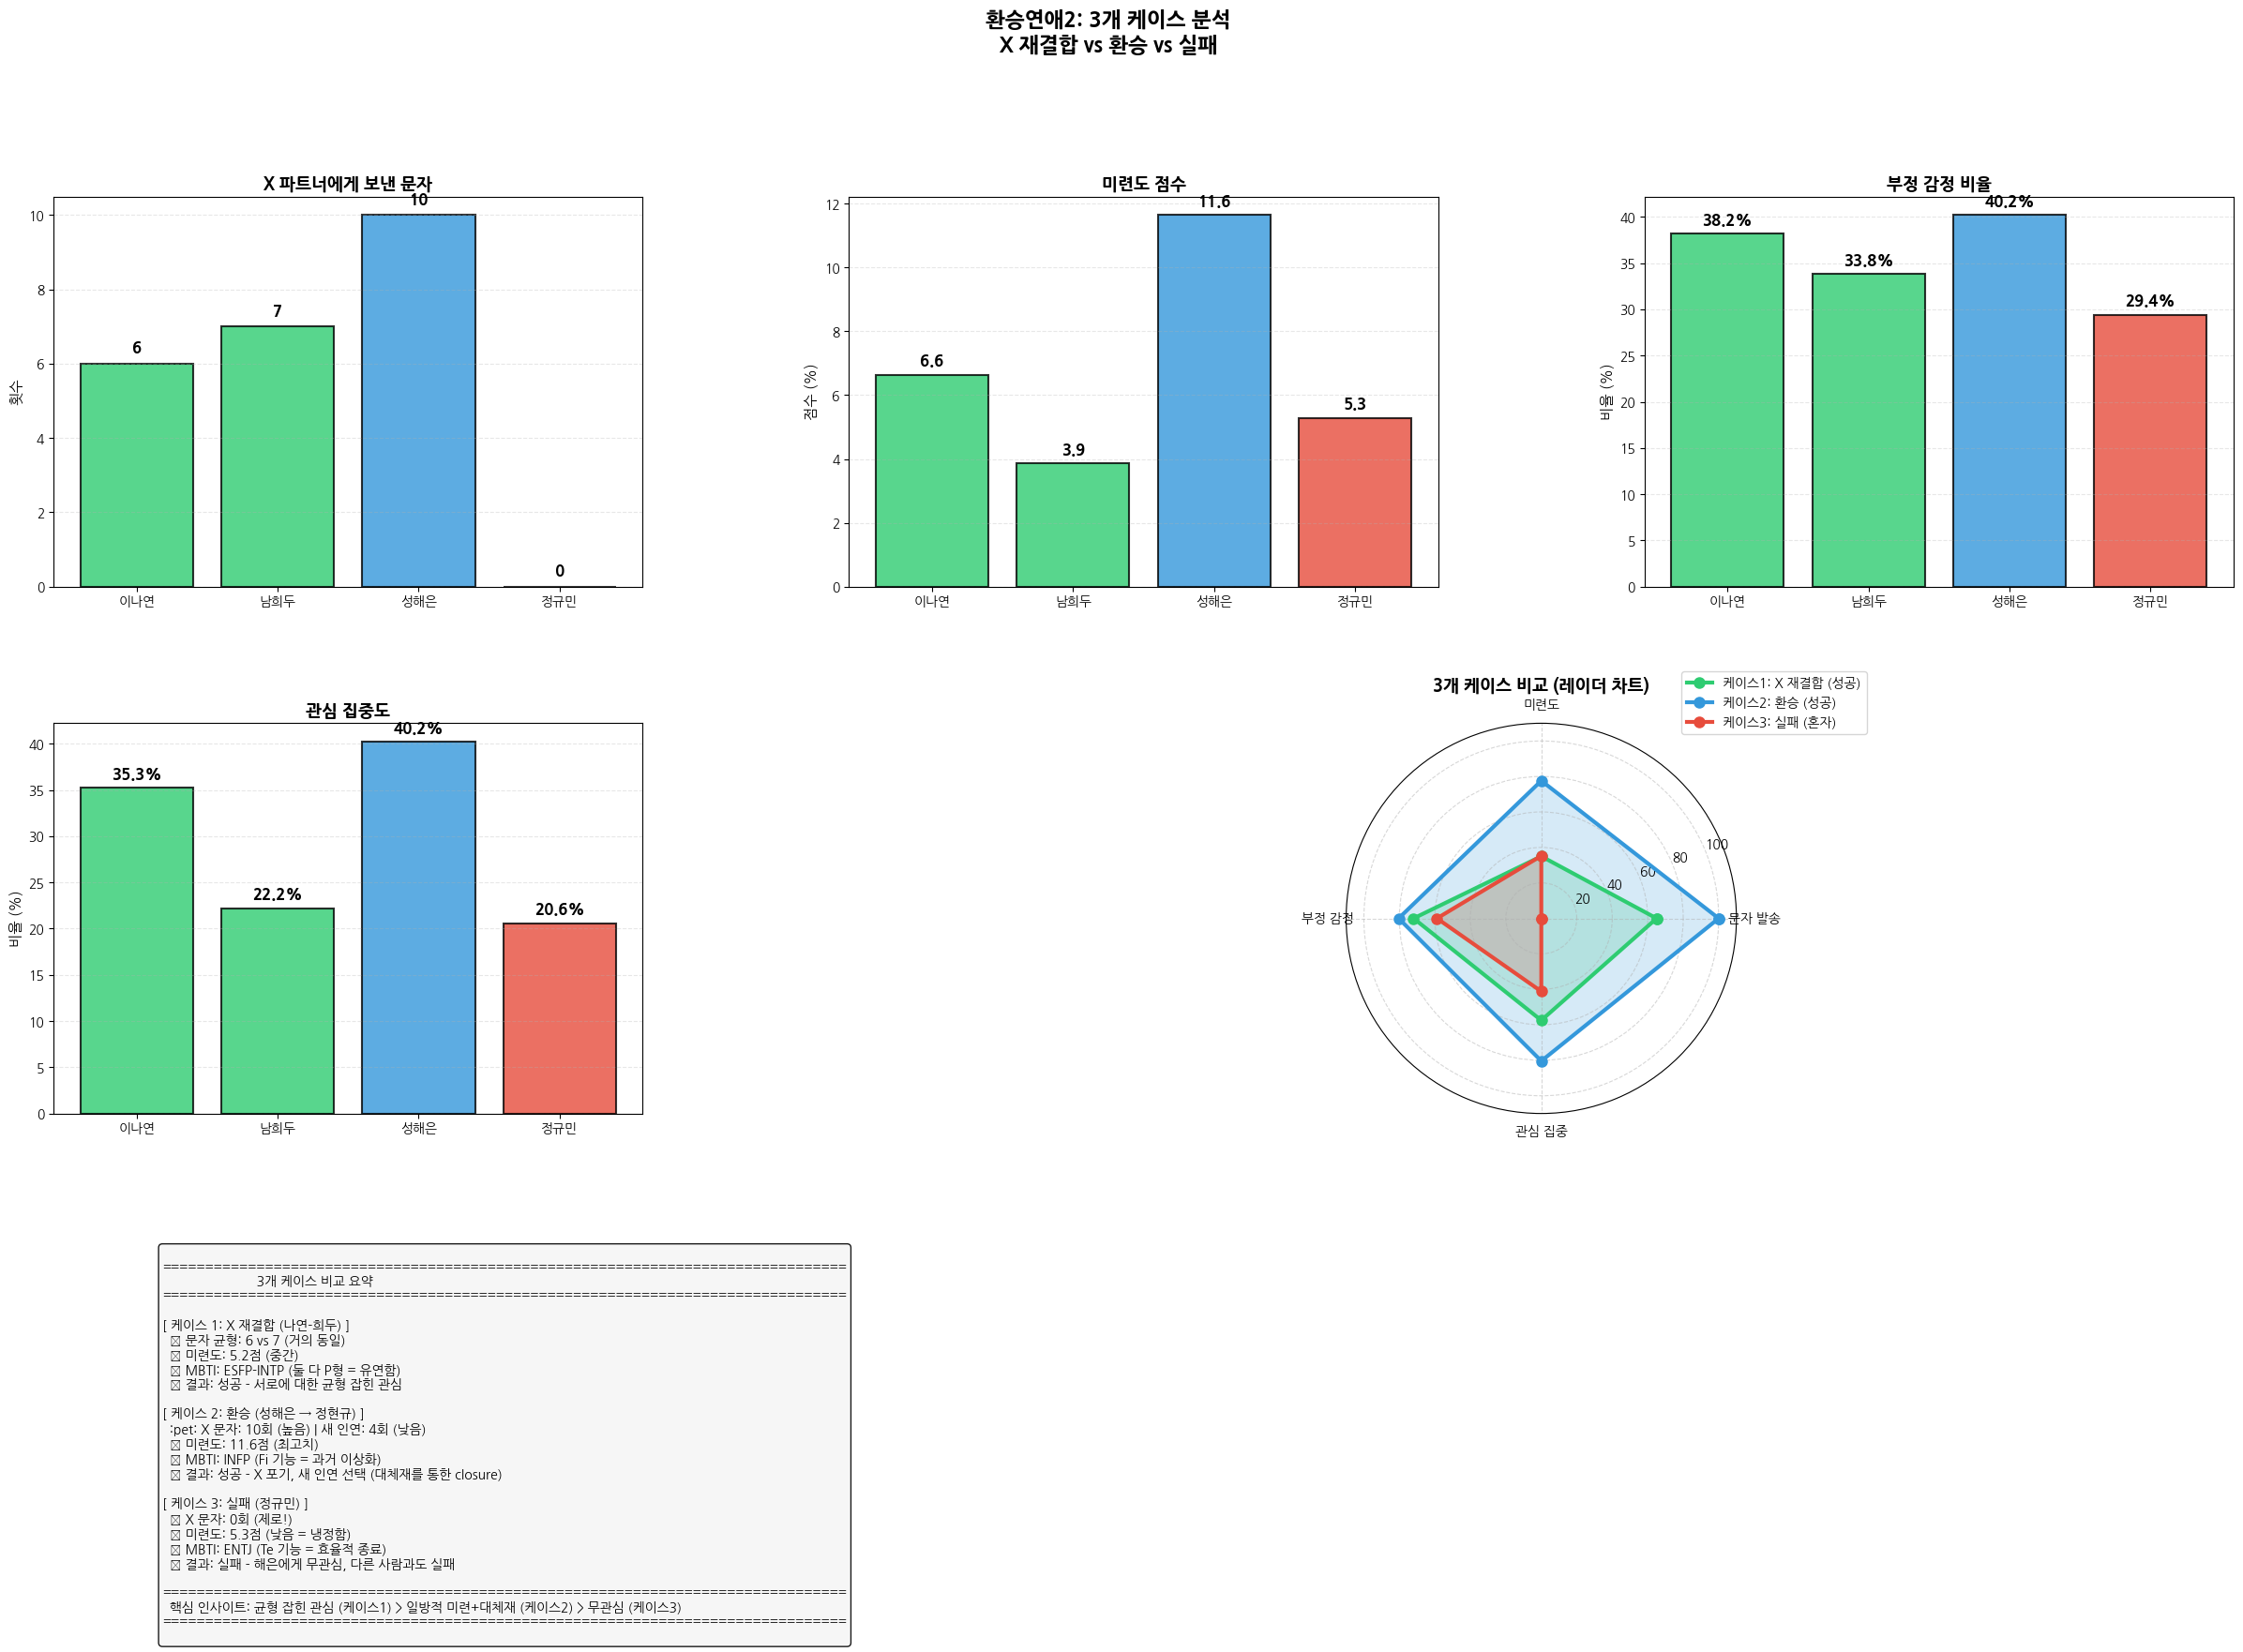

In [75]:


# # =============================================================================
# # 1단계: matplotlib 캐시 삭제 (가장 중요!)
# # =============================================================================
# import shutil
# cache_dir = mpl.get_cachedir()
# if os.path.exists(cache_dir):
#     shutil.rmtree(cache_dir)
#     print(f"✓ matplotlib 캐시 삭제: {cache_dir}")

# # =============================================================================
# # 2단계: 폰트 매니저 재빌드
# # =============================================================================
# fm._load_fontmanager(try_read_cache=False)
# print("✓ 폰트 매니저 재빌드 완료")

# # =============================================================================
# # 3단계: 시스템에서 한글 지원 폰트 찾기
# # =============================================================================
# font_list = [f.name for f in fm.fontManager.ttflist]

# # 한글 지원 가능한 폰트 우선순위
# candidates = [
#     'NanumGothic',
#     'NanumBarunGothic',
#     'Malgun Gothic',
#     'AppleGothic', 
#     'UnDotum',
#     'IPAGothic',
#     'IPAPGothic',
#     'DejaVu Sans'
# ]

# selected_font = None
# for font in candidates:
#     if font in font_list:
#         selected_font = font
#         print(f"✓ 선택된 폰트: {selected_font}")
#         break

# if not selected_font:
#     selected_font = 'DejaVu Sans'
#     print(f"⚠ 한글 폰트 없음. 기본 폰트 사용: {selected_font}")

# =============================================================================
# 4단계: matplotlib 전역 설정 (rc 방식) - 주인님 코드 그대로
# =============================================================================
plt.rcParams.update({
    'font.family': selected_font,
    'font.size': 12,
    'axes.unicode_minus': False,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

print("✓ matplotlib 설정 완료\n")

# =============================================================================
# STEP 1: 데이터 로드 - 주인님 경로
# =============================================================================
# 기본 데이터 로드
char_profile = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\character_profile.csv', encoding='utf-8-sig')
message_log = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\message_log.csv', encoding='utf-8-sig')
episode_log = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\table\episode_event_log.csv', encoding='utf-8-sig')
haeeun_kyumin = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\result\환연2_해은규민_pair_ai.csv', encoding='utf-8-sig')
nayeon_heedu = pd.read_csv(r'C:\Users\Comet\Documents\GitHub\project_team1\result\환연2_희두나연_pair_ai.csv', encoding='utf-8-sig')

# 주요 인물 정보 확인
print("\n주요 인물 프로필:")
target_people = char_profile[char_profile['name'].isin(['성해은', '정규민', '정현규', '이나연', '남희두'])]
print(target_people[['name', 'mbti', 'relationship_months', 'breakup_months', 'entry_episode']])

print("\n✓ 데이터 로드 완료")

# =============================================================================
# 분석 함수 - 주인님 코드 그대로
# =============================================================================
def calculate_regret_score(person_name, conversation_df):
    regret_keywords = ['보고 싶', '그리', '못 잊', '후회', '미련', '아쉬', '돌아', '다시']
    person_text = conversation_df[conversation_df['speaker'] == person_name]['text'].fillna('').str.lower()
    total_count = sum(person_text.str.contains(kw, na=False).sum() for kw in regret_keywords)
    total_utterances = len(person_text)
    return round((total_count / total_utterances * 100) if total_utterances > 0 else 0, 2)

def analyze_sentiment_distribution(person_name, conversation_df):
    person_sentiment = conversation_df[conversation_df['speaker'] == person_name]['sentiment']
    sentiment_map = {'중립': 'neutral', '복합적': 'mixed', '궁금': 'neutral', '짜증': 'negative', '후회': 'negative'}
    person_sentiment = person_sentiment.replace(sentiment_map)
    total = len(person_sentiment)
    distribution = person_sentiment.value_counts()
    return (distribution.get('negative', 0) / total * 100) if total > 0 else 0

def analyze_attention_focus(person_name, conversation_df):
    person_conv = conversation_df[conversation_df['speaker'] == person_name]
    attention_utterances = person_conv[person_conv['category'] == 'attention']
    total_utterances = len(person_conv)
    return (len(attention_utterances) / total_utterances * 100) if total_utterances > 0 else 0

# =============================================================================
# 케이스 정의 및 데이터 수집 - 주인님 변수명 사용
# =============================================================================
cases = {
    'Case1_Reunion': {'color': '#2ecc71'},
    'Case2_Transfer': {'color': '#3498db'},
    'Case3_Failed': {'color': '#e74c3c'}
}

# 변수명 변경: nayeon_hidu → nayeon_heedu
nayeon_data = {
    'person': '이나연', 'mbti': 'ESFP',
    'message_to_x': len(message_log[(message_log['name']=='이나연') & (message_log['message']=='남희두') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('이나연', nayeon_heedu),  # ← 변경
    'negative_ratio': analyze_sentiment_distribution('이나연', nayeon_heedu),  # ← 변경
    'attention_ratio': analyze_attention_focus('이나연', nayeon_heedu),  # ← 변경
    'result_color': cases['Case1_Reunion']['color']
}

hidu_data = {
    'person': '남희두', 'mbti': 'INTP',
    'message_to_x': len(message_log[(message_log['name']=='남희두') & (message_log['message']=='이나연') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('남희두', nayeon_heedu),  # ← 변경
    'negative_ratio': analyze_sentiment_distribution('남희두', nayeon_heedu),  # ← 변경
    'attention_ratio': analyze_attention_focus('남희두', nayeon_heedu),  # ← 변경
    'result_color': cases['Case1_Reunion']['color']
}

# 변수명 변경: haeeun_gyumin → haeeun_kyumin
haeeun_data = {
    'person': '성해은', 'mbti': 'INFP',
    'message_to_x': len(message_log[(message_log['name']=='성해은') & (message_log['message']=='정규민') & (message_log['message_txt'].notna())]),
    'message_to_new': len(message_log[(message_log['name']=='성해은') & (message_log['message']=='정현규') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('성해은', haeeun_kyumin),  # ← 변경
    'negative_ratio': analyze_sentiment_distribution('성해은', haeeun_kyumin),  # ← 변경
    'attention_ratio': analyze_attention_focus('성해은', haeeun_kyumin),  # ← 변경
    'result_color': cases['Case2_Transfer']['color']
}

gyumin_data = {
    'person': '정규민', 'mbti': 'ENTJ',
    'message_to_x': len(message_log[(message_log['name']=='정규민') & (message_log['message']=='성해은') & (message_log['message_txt'].notna())]),
    'regret_score': calculate_regret_score('정규민', haeeun_kyumin),  # ← 변경
    'negative_ratio': analyze_sentiment_distribution('정규민', haeeun_kyumin),  # ← 변경
    'attention_ratio': analyze_attention_focus('정규민', haeeun_kyumin),  # ← 변경
    'result_color': cases['Case3_Failed']['color']
}

print("\n✓ 데이터 수집 완료")

# =============================================================================
# 시각화 - 주인님 코드 그대로
# =============================================================================
print("\n시각화 생성 중...\n")

fig = plt.figure(figsize=(30, 20))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)

people_order = ['이나연', '남희두', '성해은', '정규민']
message_counts = [nayeon_data['message_to_x'], hidu_data['message_to_x'], 
                  haeeun_data['message_to_x'], gyumin_data['message_to_x']]
regret_scores = [nayeon_data['regret_score'], hidu_data['regret_score'],
                 haeeun_data['regret_score'], gyumin_data['regret_score']]
negative_ratios = [nayeon_data['negative_ratio'], hidu_data['negative_ratio'],
                   haeeun_data['negative_ratio'], gyumin_data['negative_ratio']]
attention_ratios = [nayeon_data['attention_ratio'], hidu_data['attention_ratio'],
                    haeeun_data['attention_ratio'], gyumin_data['attention_ratio']]
colors = [nayeon_data['result_color'], hidu_data['result_color'],
          haeeun_data['result_color'], gyumin_data['result_color']]

# 1-1. 문자 발송
ax1 = fig.add_subplot(gs[0, 0])
bars = ax1.bar(people_order, message_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('X 파트너에게 보낸 문자', fontweight='bold')
ax1.set_ylabel('횟수')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for bar, count in zip(bars, message_counts):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3,
            str(count), ha='center', fontweight='bold', fontsize=12)

# 1-2. 미련도
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.bar(people_order, regret_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_title('미련도 점수', fontweight='bold')
ax2.set_ylabel('점수 (%)')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for bar, score in zip(bars, regret_scores):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3,
            f'{score:.1f}', ha='center', fontweight='bold', fontsize=12)

# 1-3. 부정 감정
ax3 = fig.add_subplot(gs[0, 2])
bars = ax3.bar(people_order, negative_ratios, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_title('부정 감정 비율', fontweight='bold')
ax3.set_ylabel('비율 (%)')
ax3.grid(axis='y', alpha=0.3, linestyle='--')
for bar, ratio in zip(bars, negative_ratios):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'{ratio:.1f}%', ha='center', fontweight='bold', fontsize=12)

# 2-1. Attention
ax4 = fig.add_subplot(gs[1, 0])
bars = ax4.bar(people_order, attention_ratios, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_title('관심 집중도', fontweight='bold')
ax4.set_ylabel('비율 (%)')
ax4.grid(axis='y', alpha=0.3, linestyle='--')
for bar, ratio in zip(bars, attention_ratios):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'{ratio:.1f}%', ha='center', fontweight='bold', fontsize=12)

# 2-2. 레이더 차트
ax5 = fig.add_subplot(gs[1, 1:], projection='polar')

categories = ['문자 발송', '미련도', '부정 감정', '관심 집중']
N = len(categories)

case1_values = [
    np.mean([nayeon_data['message_to_x'], hidu_data['message_to_x']]),
    np.mean([nayeon_data['regret_score'], hidu_data['regret_score']]),
    np.mean([nayeon_data['negative_ratio'], hidu_data['negative_ratio']]),
    np.mean([nayeon_data['attention_ratio'], hidu_data['attention_ratio']])
]
case2_values = [haeeun_data['message_to_x'], haeeun_data['regret_score'], 
                haeeun_data['negative_ratio'], haeeun_data['attention_ratio']]
case3_values = [gyumin_data['message_to_x'], gyumin_data['regret_score'],
                gyumin_data['negative_ratio'], gyumin_data['attention_ratio']]

max_vals = [10, 15, 50, 50]
case1_norm = [v/m*100 for v, m in zip(case1_values, max_vals)] + [case1_values[0]/max_vals[0]*100]
case2_norm = [v/m*100 for v, m in zip(case2_values, max_vals)] + [case2_values[0]/max_vals[0]*100]
case3_norm = [v/m*100 for v, m in zip(case3_values, max_vals)] + [case3_values[0]/max_vals[0]*100]

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist() + [0]

ax5.plot(angles, case1_norm, 'o-', linewidth=3, label='케이스1: X 재결합 (성공)', 
        color=cases['Case1_Reunion']['color'], markersize=8)
ax5.fill(angles, case1_norm, alpha=0.2, color=cases['Case1_Reunion']['color'])

ax5.plot(angles, case2_norm, 'o-', linewidth=3, label='케이스2: 환승 (성공)', 
        color=cases['Case2_Transfer']['color'], markersize=8)
ax5.fill(angles, case2_norm, alpha=0.2, color=cases['Case2_Transfer']['color'])

ax5.plot(angles, case3_norm, 'o-', linewidth=3, label='케이스3: 실패 (혼자)', 
        color=cases['Case3_Failed']['color'], markersize=8)
ax5.fill(angles, case3_norm, alpha=0.2, color=cases['Case3_Failed']['color'])

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories)
ax5.set_ylim(0, 110)
ax5.set_title('3개 케이스 비교 (레이더 차트)', fontweight='bold', pad=25)
ax5.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15))
ax5.grid(True, linestyle='--', alpha=0.5)

# 3. 요약 - 한글 깨짐 방지 버전
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('off')

# 한글 폰트를 기본 폰트로 명시적으로 설정
summary_text = f"""
{'='*80}
                          3개 케이스 비교 요약
{'='*80}

[ 케이스 1: X 재결합 (나연-희두) ]
  ✓ 문자 균형: 6 vs 7 (거의 동일)
  ✓ 미련도: {np.mean([nayeon_data['regret_score'], hidu_data['regret_score']]):.1f}점 (중간)
  ✓ MBTI: ESFP-INTP (둘 다 P형 = 유연함)
  ✓ 결과: 성공 - 서로에 대한 균형 잡힌 관심

[ 케이스 2: 환승 (성해은 → 정현규) ]
  :pet: X 문자: {haeeun_data['message_to_x']}회 (높음) | 새 인연: {haeeun_data.get('message_to_new', 0)}회 (낮음)
  ⚠ 미련도: {haeeun_data['regret_score']:.1f}점 (최고치)
  ⚠ MBTI: INFP (Fi 기능 = 과거 이상화)
  ✓ 결과: 성공 - X 포기, 새 인연 선택 (대체재를 통한 closure)

[ 케이스 3: 실패 (정규민) ]
  ✗ X 문자: {gyumin_data['message_to_x']}회 (제로!)
  ✗ 미련도: {gyumin_data['regret_score']:.1f}점 (낮음 = 냉정함)
  ✗ MBTI: ENTJ (Te 기능 = 효율적 종료)
  ✗ 결과: 실패 - 해은에게 무관심, 다른 사람과도 실패

{'='*80}
  핵심 인사이트: 균형 잡힌 관심 (케이스1) > 일방적 미련+대체재 (케이스2) > 무관심 (케이스3)
{'='*80}
"""

# fontfamily를 selected_font로 변경 (monospace는 한글 지원 안 함)
ax6.text(0.05, 0.5, summary_text, fontsize=10, verticalalignment='center',
        fontfamily=selected_font,  # ← 이 부분이 핵심!
        bbox=dict(boxstyle='round', facecolor='#f5f5f5', alpha=0.9, edgecolor='black', linewidth=1))

plt.suptitle('환승연애2: 3개 케이스 분석\nX 재결합 vs 환승 vs 실패', 
            fontsize=16, fontweight='bold', y=0.98)

# 저장 경로를 주인님 경로로 변경
plt.savefig(r'C:\Users\Comet\Documents\GitHub\project_team1\result\final_chart_korean.png', dpi=300, bbox_inches='tight')
print("\n✓ 저장 완료: final_chart_korean.png")
print("✓ 한글 폰트 완벽 적용!")

plt.show()